In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# On Classifier Evaluation

## Confusion Matrix

For classification problems, the target is a categorical variable. This means that we can simply count the number of times that our model predicts the correct category and the number of times that it predicts something else.

We can visualize this by means of a **confusion matrix**, which displays counts of correct and incorrect predictions. We'll explore this below. There are [many ways](https://docs.google.com/document/d/13Oi3lrJl-It0VOBw9EcjPHFkg3RqYp4nZ1Cx2uq-7VE/edit?usp=sharing) of evaluating a classification model, but most derive from the confusion matrix.

## Lottery Number Prediction

Suppose I want to train a model to predict whether a string of six numbers (a "ticket") would win the lottery or not. What sort of data might I use?

### Scenario 1

I gather all the winning tickets from the last 10000 days or so. So I have one column for the tickets themselves, and a Boolean column indicating whether the ticket was a winner or not.

Now if all the tickets on which my model trains are *winning* tickets, then it would predict every ticket to win! Suppose I test the model on a set of 1000 tickets, and suppose that there is exactly one winning ticket among those 1000. My model will always predict the ticket to win. Let's think about what the confusion matrix will look like.

In [2]:
# Setting up the true values
y_true = np.zeros(1000)
y_true[500] = 1

In [3]:
# Setting up the predictions
y_pred = np.ones(1000)

In [4]:
# Defining the confusion matrix
cm_1 = confusion_matrix(y_true, y_pred)

The confusion matrix should tell us that we have 999 false positives (999 losing tickets predicted to win) and 1 true positive (1 winning ticket predicted to win):

In [5]:
cm_1

array([[  0, 999],
       [  0,   1]])

Notice the way that sklearn displays its confusion matrix: The rows are \['actually false', 'actually true'\]; the columns are \['predicted false', 'predicted true'\].

So it displays:

$\begin{bmatrix}
TN & FP \\
FN & TP
\end{bmatrix}$

In [6]:
tn = cm_1[0, 0]
fp = cm_1[0, 1]
fn = cm_1[1, 0]
tp = cm_1[1, 1]

Let's see if we can calculate some of our metrics for this matrix.

**Accuracy** = $\frac{TP + TN}{TP + TN + FP + FN}$

In words: How often did my model get the right answer?

In [7]:
# Accuracy
print('Accuracy:', (tp + tn)/ (tp + tn + fp + fn))

Accuracy: 0.001


**Recall** = $\frac{TP}{TP + FN}$

In words: How often did my model correctly predict winning tickets?

In [8]:
# Recall
print('Recall:', tp / (tp + fn))

Recall: 1.0


**Precision** = $\frac{TP}{TP + FP}$

In words: How often was my model's prediction of 'winner' correct?

In [9]:
# Precision
print('Precision:', tp/(tp+fp))

Precision: 0.001


**F-1 Score** = $\frac{2PrRc}{Pr + Rc}$ = $\frac{2TP}{2TP + FP + FN}$

In [10]:
# F-1 Score
print('F-1 Score:', 2*tp/(2*tp+fp+fn))

F-1 Score: 0.001998001998001998


### Scenario 2

Well, my recall was good, but everything else I measured was terrible! Can I do better?

This time I'll train my model in a much different way. I'll give it the tickets of 10000 people who played the lottery yesterday. Suppose that there are one winning ticket and 9999 losers. Now I test the model on the same 1000 tickets from before in Scenario 1.

This time my model will almost always predict a ticket to lose. Suppose that, in the 1000 predictions, it makes only one prediction of a winner, and suppose that this prediction is wrong.

In [11]:
# Set up predictions
y_pred_2 = np.zeros(1000)
y_pred_2[0] = 1

Instead of coding out the scores by hand, we can use sklearn to speed things up.

In [12]:
# Import accuracy, precision, recall, and f1 from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [13]:
# Print out the scores for each metric
accuracy = accuracy_score(y_true, y_pred_2)
precision = precision_score(y_true, y_pred_2)
recall = recall_score(y_true, y_pred_2)
f1 = f1_score(y_true, y_pred_2)

print('Accuracy', accuracy)
print('Precision', precision)
print('Recall', recall)
print('F1', f1)

Accuracy 0.998
Precision 0.0
Recall 0.0
F1 0.0


## Resampling

The last classifier had a really high accuracy, but everything else was terrible.

In both cases, the problem we ran into was **class imbalance**. A popular solution for such a problem is resampling our data. To do this, let's take a look at [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE).

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
data = make_classification(n_samples = 10000, weights=[0.1, 0.9])
X = data[0]
y = data[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)

In [16]:
data[1]

array([0, 1, 1, ..., 1, 1, 1])

In [17]:
# Check class balance for the training data
pd.Series(y_train).value_counts(normalize=True)

1    0.8936
0    0.1064
dtype: float64

This is a pretty imbalanced dataset. Only 10% of the data has a class of `0`.

Let's use resampling to address this:

In [19]:
resample = SMOTE(random_state=2021)
X_train_resampled, y_train_resampled = resample.fit_resample(X_train, y_train)

In [20]:
pd.Series(y_train_resampled).value_counts(normalize=True)

1    0.5
0    0.5
dtype: float64

## Multiple Classes

We can understand these metrics of recall, precision, and the rest even if there are more than two classes in our classification problem.

In [21]:
flowers = load_iris()

In [22]:
print(flowers.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [23]:
dims_train, dims_test, spec_train, spec_test = train_test_split(flowers.data,
                                                                flowers.target,
                                                                test_size=0.5,
                                                               random_state=2021)

In [24]:
spec_train[:5]

array([0, 0, 0, 2, 0])

In [25]:
np.unique(spec_train)

array([0, 1, 2])

Looking at training targets, there are three classes

In [26]:
ss_f = StandardScaler()

ss_f.fit(dims_train)

dims_train_sc = ss_f.transform(dims_train)
dims_test_sc = ss_f.transform(dims_test)

In [27]:
logreg_f = LogisticRegression(multi_class='multinomial',
                             C=0.01, random_state=42)

logreg_f.fit(dims_train_sc, spec_train)

LogisticRegression(C=0.01, multi_class='multinomial', random_state=42)

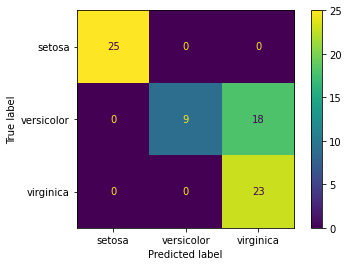

In [28]:
plot_confusion_matrix(estimator=logreg_f,
                      X=dims_test_sc,
                      y_true=spec_test,
                     display_labels=[
                         'setosa',
                         'versicolor',
                         'virginica'
                            ]);

In [29]:
accuracy_score(spec_test,
              logreg_f.predict(dims_test_sc))

0.76

In [30]:
(29 + 15 + 22) / (spec_test.shape[0])

0.88

In [31]:
precision_score(spec_test,
                logreg_f.predict(dims_test_sc),
               average=None)

array([1.        , 1.        , 0.56097561])

In [32]:
# Calculate by hand


In [33]:
recall_score(spec_test,
            logreg_f.predict(dims_test_sc),
            average=None)

array([1.        , 0.33333333, 1.        ])

In [34]:
# Calculate by hand


For multi-class precision, the relevant denominator is a **column**; for multi-class recall, the relevant denominator is a **row**.

## Which Metric Should I Care About?

Well, it depends.

### General Lessons

First, let's make some general observations about the metrics we've so far defined.

Accuracy:
- Pro: Takes into account both false positives and false negatives.
- Con: Can be misleadingly high when there is a significant class imbalance. (A lottery-ticket predictor that *always* predicts a loser will be highly accurate.)

Recall:
- Pro: Highly sensitive to false negatives.
- Con: No sensitivity to false positives.

Precision:
- Pro: Highly sensitive to false positives.
- Con: No sensitivity to false negatives.

F-1 Score:
- Harmonic mean of recall and precision.
    - Pro: Balanced both recall and precision
    - Con: Harder to interpret/explain

### Using classification metrics with sklearn's cross validation

In [35]:
# Import some classification data
data = make_classification()
X = data[0]
y = data[1]

# Create train test split
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2021)

# Create a model
model = LogisticRegression(solver='lbfgs')

The metrics [found here](https://scikit-learn.org/stable/modules/model_evaluation.html) are built into sklearn's cross validation

In [36]:
recall = cross_val_score(model, X_train, y_train, scoring='recall', cv=5)
precision = cross_val_score(model, X_train, y_train, scoring='precision', cv=5)
f1 = cross_val_score(model, X_train, y_train, scoring='f1', cv=5)
accuracy = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5)

In [37]:
print('Average recall:', recall.mean())
print('Average precision:', precision.mean())
print('Average f1:', f1.mean())
print('Average accuracy:', accuracy.mean())

Average recall: 0.8142857142857143
Average precision: 0.9130952380952382
Average f1: 0.8524542124542125
Average accuracy: 0.8666666666666666


### Exercise

If you wanted to use resampling with multiple fold cross validation, ***you cannot resample before making your cross validated splits***. When using resampling, you should always evaluate your model on *unbalanced* data. 

ie, the following would be *incorrect*
```
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train, y_train = resample.fit_resample(X_train, y_train)

scores = cross_val_score(model, X_train, y_train)
```

Because of this, you would need to write out the cross validation yourself using `Kfolds`.

**In the cell below, comments have been provided to quide you through every step of this cross validation process.**

In [38]:
# Import KFold from sklearn

# Import precision, recall, 
# accuracy, and precision from sklearn


# Create a kfolds object

# Create a list for each 
# classification score


# Instantiate a logistic regression model

# Instantiate a standard scaler

# Instantiate a smote object


# Loop over the training and validation indices
# using the kfolds object

    # Split X_train into a train and validation split

    
    # Scale and transform the training 
    # split using the standard scaler

    
    # Resample the training split
    
    # Fit the model to the resampled training split
    
    # Scale the validation split

    # Produce predictions for the validation split

    # Calculate the recall, precision, f1, and accuracy scores

    # Append the calculated scores to their corresponding list

    
# Print the mean of each score list    